In [ ]:
"""
    File : cumuprobaMicrodiversitySpatialFeatures.ipynb
    Plot : cumulative probability distribution of normalised distance to tumour centre from microdiversity hotspots
    Input : (related to several figure panels)
        SourceData_Fig3e.xlsx
        SourceData_ExtendedData_Fig5b.xlsx
        SourceData_ExtendedData_Fig5ef.xlsx
"""

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
path_to_all_source_data = "../Source data for figures"

In [41]:
def config_ax(ax, xlim = [5e-3,1]):
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(xlim)

    ax.set_xlabel('Normalised distance to centre')
    ax.set_ylabel('Cumulative probability') 
def config_font_size(figsize):
    params = {'legend.fontsize': 6,
              'figure.figsize': figsize,
             'axes.labelsize': 8,
             'axes.titlesize': 8,
             'xtick.labelsize':6,
             'ytick.labelsize':6,
             'pdf.fonttype':42}
    plt.rcParams.update(params)
def plot_null_model(ax):
    # Add a line showing the null distribution.
    xs = np.linspace(0,1,500)
    ys = [x*x for x in xs]
    ax.plot(xs,ys,ls='--', c='#AAAAAA', label = "Null model", lw=0.5)
def plot_cumu_freq(data, label, color, ax):
    n_bins = 50
    n, bins, patches = ax.hist(
        data.distances, n_bins, density=True, histtype='step',
        cumulative=True, label=label, color = color, lw=0.5,
        range = (0,1)
    )

    return (n, bins, patches)

def plot_data(data, labels, colors):

    fig = plt.figure(dpi=300)
    ax = fig.add_axes([0.2,0.2,0.75,0.75])

    config_font_size(figsize = (4,3))
    config_ax(ax, [5e-3,1])
    plot_null_model(ax)

    for label, color in zip(
        labels, colors
    ):
        df_spots = data.loc[
            data.label == label,
            ["distances"]
        ]
        plot_info = plot_cumu_freq(df_spots, label=label, color = color, ax = ax)

    plt.legend(loc='upper left')
    plt.show()
    plt.close()
        
def read_and_plot(sheet_names, labels, colors):
    
    for sheet_name in excelfile.sheet_names:
        
        data = pd.read_excel(
            excelfile, 
            sheet_name=sheet_name,
        )
        
        fig = plt.figure(dpi=300)
        ax = fig.add_axes([0.2,0.2,0.75,0.75])

        config_font_size(figsize = (4,3))
        config_ax(ax, [5e-3,1])
        plot_null_model(ax)

        for label, color in zip(
            labels, colors
        ):
            df_spots = data.loc[
                data.label == label,
                ["distances"]
            ]
            plot_info = plot_cumu_freq(df_spots, label=label, color = color, ax = ax)

        plt.legend(loc='upper left')
        plt.show()
        plt.close()
        

# Figure 3e

In [47]:
labels = [
    "S p=2e-4", "S p=6e-4", "S p=1e-3",
    "V p=2e-4", "V p=6e-4", "V p=1e-3",
    "RCC"
]

colors = [
    '#FFCCCC', '#FF6666', '#FF0000',
    '#CCCCFF', '#6666FF', '#0000FF',
    'Purple'
]

In [48]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_3",
    "SourceData_Fig3e.xlsx"
)

In [49]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataFig3e']

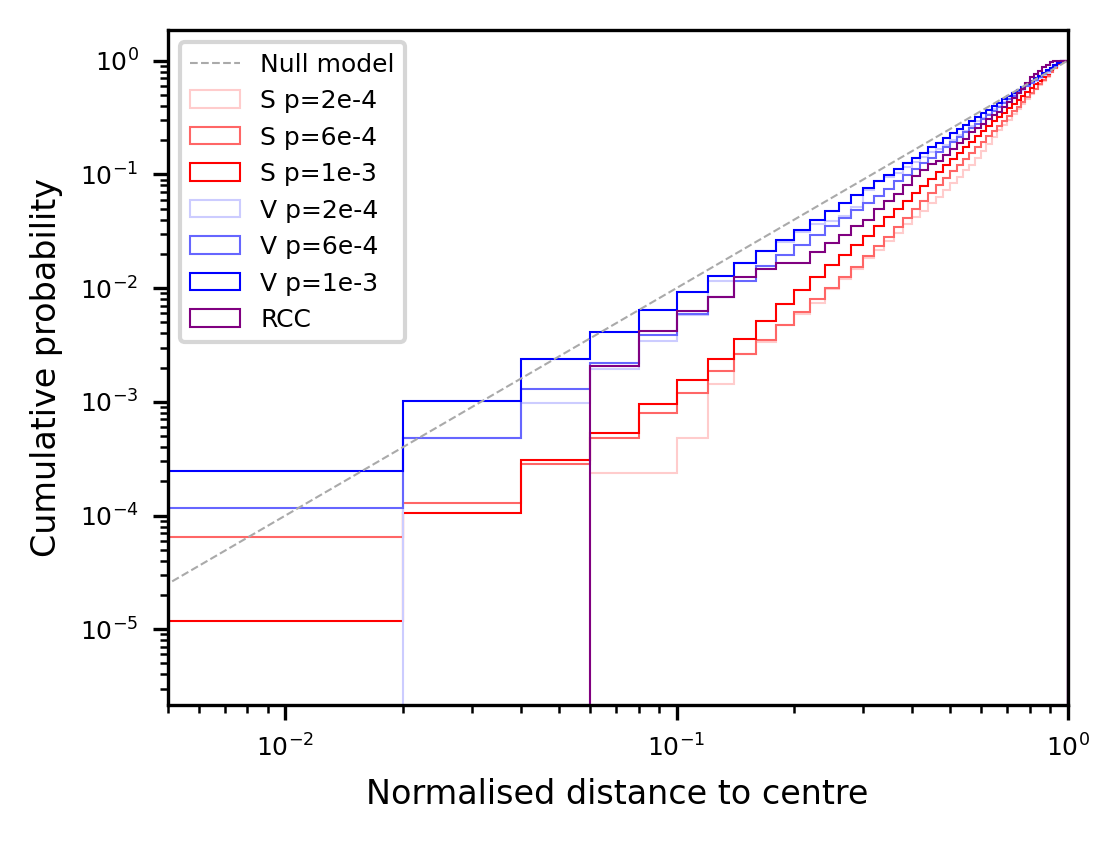

In [50]:
read_and_plot(excelfile.sheet_names, labels, colors)

# Extended Data Figure 5e & 5f

In [13]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Extended_Data_Figure_5",
    "SourceData_ExtendedData_Fig5ef.xlsx"
)

In [14]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataEDFig5e', 'SourceDataEDFig5f']

### ED Figure 5e

In [39]:
labels = [
    "S p=2e-4", "S p=6e-4", "S p=1e-3", 
    "S p=2e-4 randomised",
    "S p=6e-4 randomised",
    "S p=1e-3 randomised"
]
colors = [
    '#FFCCCC', '#FF6666', '#FF0000',
    '#CCCCCC', '#666666', '#000000'
]

In [19]:
# read .xlsx resulted in loss of data as excel doesn't support containing this large number of rows
# read_and_plot(excelfile.sheet_names[:1], labels, colors)

In [21]:
# read .csv 
data = pd.read_csv(
    os.path.join(
        path_to_all_source_data,
        "Source_Data_Extended_Data_Figure_5",
        "SourceData_ED_Fig5e",
        "df_microdiversity_hotspots_surface_randomised.csv"
    )
)

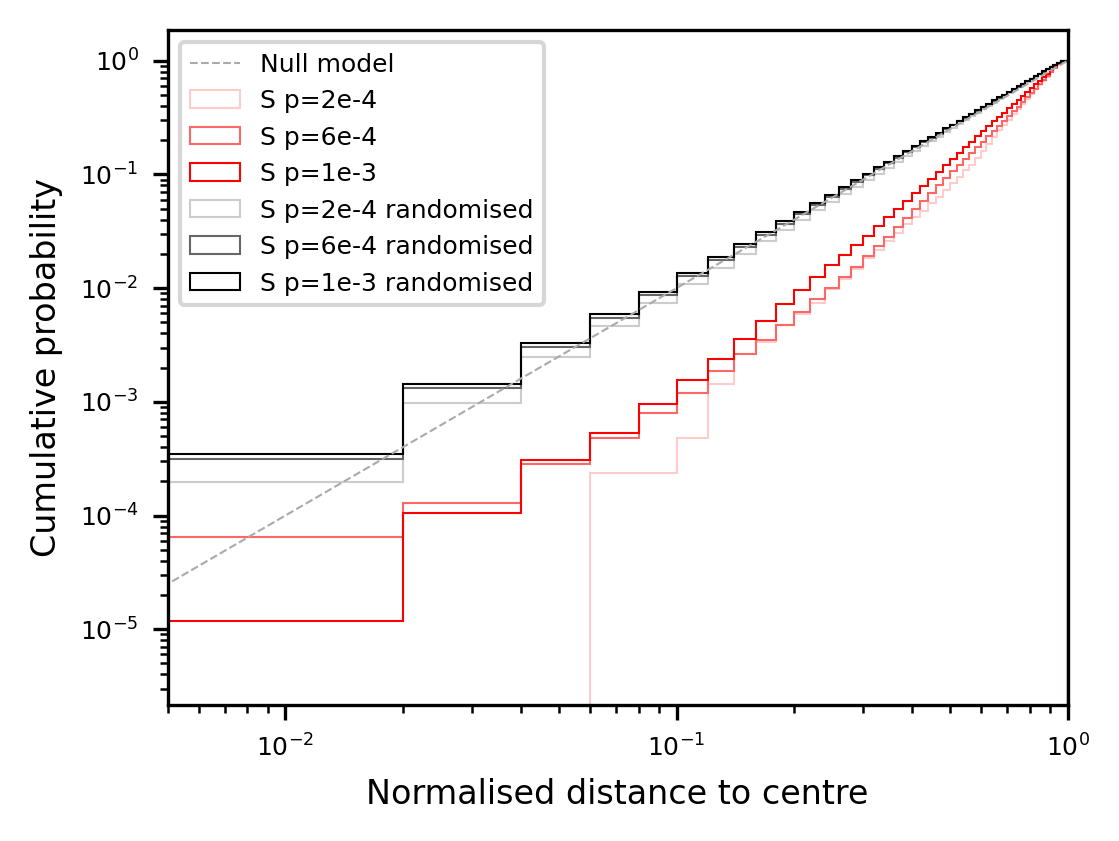

In [42]:
plot_data(data, labels, colors)

### ED Figure 5f

In [43]:
labels = [
    "V p=2e-4", "V p=6e-4", "V p=1e-3", 
    "V p=2e-4 randomised",
    "V p=6e-4 randomised",
    "V p=1e-3 randomised"
]
colors = [
    '#CCCCFF', '#6666FF', '#0000FF',
    '#CCCCCC', '#666666', '#000000'
]

In [44]:
# read .xlsx resulted in loss of data as excel doesn't support containing this large number of rows
# read_and_plot(excelfile.sheet_names[-1:], labels, colors)

In [45]:
# read .csv 
data = pd.read_csv(
    os.path.join(
        path_to_all_source_data,
        "Source_Data_Extended_Data_Figure_5",
        "SourceData_ED_Fig5f",
        "df_microdiversity_hotspots_volume_randomised.csv"
    )
)

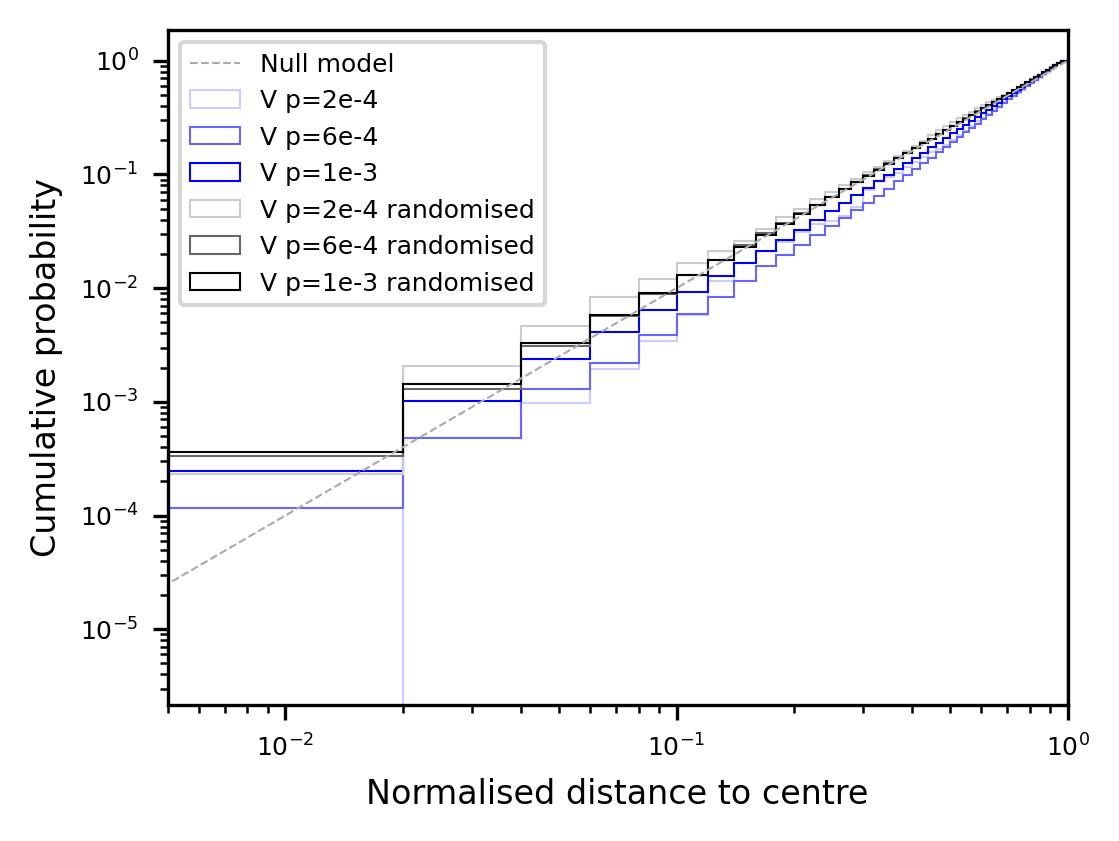

In [46]:
plot_data(data, labels, colors)